In [102]:
# Importing Libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
# Styling used for VSCode
from matplotlib import style
style.use('dark_background')

# Importing Data
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [103]:
# Preprocessing
X = data.drop('Diabetes_binary', axis=1)
y = data.iloc[:,0]
X.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [87]:
# Split train and test : 5%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [88]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


In [93]:
avg = (1-np.array(error))*100
for i in range(0,19):
    print("If K = %d , then accuracy is %d%%" %(i+1,avg[i]))

If K = 1 , then accuracy is 80%
If K = 2 , then accuracy is 85%
If K = 3 , then accuracy is 83%
If K = 4 , then accuracy is 85%
If K = 5 , then accuracy is 84%
If K = 6 , then accuracy is 85%
If K = 7 , then accuracy is 85%
If K = 8 , then accuracy is 85%
If K = 9 , then accuracy is 85%
If K = 10 , then accuracy is 85%
If K = 11 , then accuracy is 85%
If K = 12 , then accuracy is 86%
If K = 13 , then accuracy is 85%
If K = 14 , then accuracy is 86%
If K = 15 , then accuracy is 86%
If K = 16 , then accuracy is 86%
If K = 17 , then accuracy is 86%
If K = 18 , then accuracy is 86%
If K = 19 , then accuracy is 86%


Text(0, 0.5, 'Mean Error')

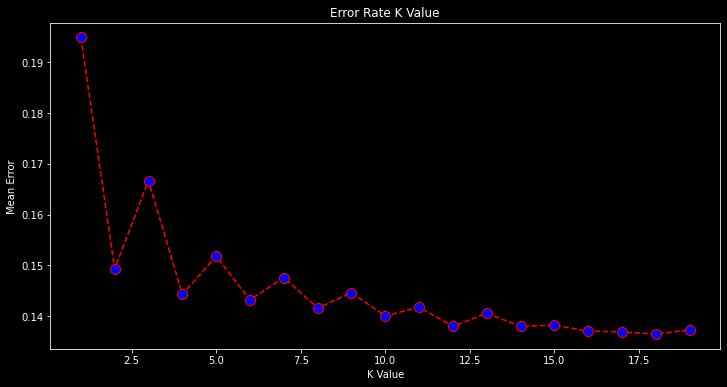

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [97]:
#Training and Predictions with k=12
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [98]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [99]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10727   232]
 [ 1518   207]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     10959
         1.0       0.47      0.12      0.19      1725

    accuracy                           0.86     12684
   macro avg       0.67      0.55      0.56     12684
weighted avg       0.82      0.86      0.82     12684



(253680, 2)


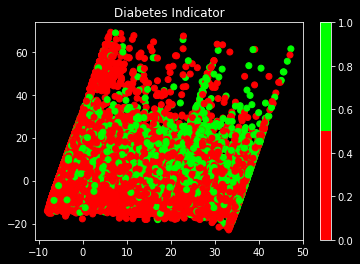

In [100]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
# Create color maps
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

pca = PCA(n_components=2)
pca.fit(X)
PCAX = pca.transform(X)
print(PCAX.shape)

# Plot also the training points
plt.scatter(PCAX[:, 0], PCAX[:, 1], c=y, cmap=cmap_bold, s=1)
plt.title("Diabetes Indicator")
plt.colorbar()
plt.show()

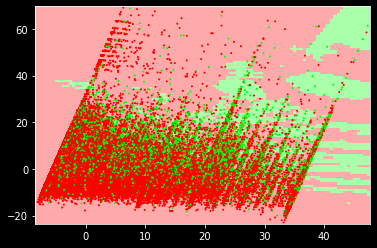

In [111]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# generate dataset
pca = PCA(n_components=2)
pca.fit(X)
PCAX = pca.transform(X)

# # define bounds of the domain
knn = neighbors.KNeighborsClassifier(n_neighbors=12)
knn.fit(PCAX, y)

x_min, x_max = PCAX[:, 0].min() - .1, PCAX[:, 0].max() + .1
y_min, y_max = PCAX[:, 1].min() - .1, PCAX[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(PCAX[:, 0], PCAX[:, 1], c=y, cmap=cmap_bold, s=1)
# plt.axis('tight')
# # # define the model
# # # fit the model
# classifier = KNeighborsClassifier(n_neighbors=12)
# classifier.fit(X_train, y_train)
# # make predictions for the grid
# yhat = classifier.predict(grid)
# # reshape the predictions back into a grid
# zz = yhat.reshape(xx.shape)
# # plot the grid of x, y and z values as a surface
# plt.contourf(xx, yy, zz, cmap=cmap_light)


# # create scatter plot for samples from each class

# plt.scatter(PCAX[:, 0], PCAX[:, 1], c=y, cmap=cmap_bold)
# plt.title("Diabetes Indicator")
# plt.colorbar()
# plt.show()

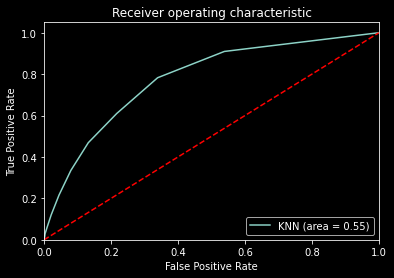

In [101]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()